In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df = pd.read_csv('/home/sounak/code/scalingsystems/tpot/cancer/Cancergeometry.csv')


# Initial data exploration to understand the structure and content
print(df.shape)
print(df.head())
print(df.info())


(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

/tmp/ipykernel_99107/2894893589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='dark')


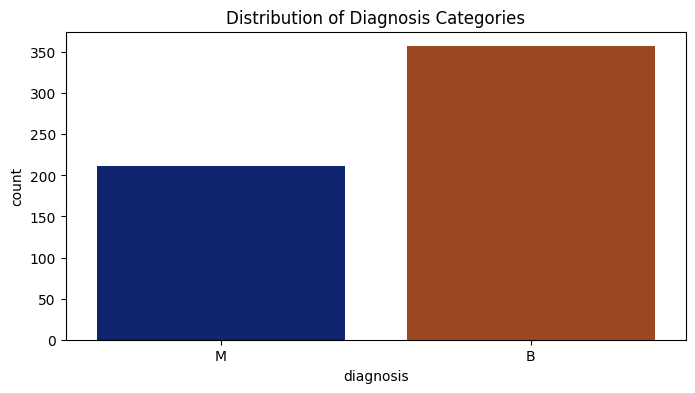

Number of benign tumors: 357
Number of malignant tumors: 212
Percentage of benign tumors: 62.74%
Percentage of malignant tumors: 37.26%


In [2]:
plt.figure(figsize=(8, 4))
sns.countplot(x='diagnosis', data=df, palette='dark')
plt.title('Distribution of Diagnosis Categories')
plt.show()

# Counting the number of observations in each category to understand the dataset's balance.
benign, malignant = df['diagnosis'].value_counts()
print(f'Number of benign tumors: {benign}')
print(f'Number of malignant tumors: {malignant}')
print(f'Percentage of benign tumors: {round(benign / len(df) * 100, 2)}%')
print(f'Percentage of malignant tumors: {round(malignant / len(df) * 100, 2)}%')


In [3]:
# Descriptive statistics for benign and malignant tumors

# Separate the data into benign and malignant for analysis
benign_data = df[df['diagnosis'] == 'B'].iloc[:, 2:] # Exclude 'id' and 'diagnosis'
malignant_data = df[df['diagnosis'] == 'M'].iloc[:, 2:] # Exclude 'id' and 'diagnosis'

# Calculate descriptive statistics
descriptive_stats_benign = benign_data.describe()
descriptive_stats_malignant = malignant_data.describe()

(descriptive_stats_benign, descriptive_stats_malignant)


(       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
 count   357.000000    357.000000      357.000000  357.000000       357.000000   
 mean     12.146524     17.914762       78.075406  462.790196         0.092478   
 std       1.780512      3.995125       11.807438  134.287118         0.013446   
 min       6.981000      9.710000       43.790000  143.500000         0.052630   
 25%      11.080000     15.150000       70.870000  378.200000         0.083060   
 50%      12.200000     17.390000       78.180000  458.400000         0.090760   
 75%      13.370000     19.760000       86.100000  551.100000         0.100700   
 max      17.850000     33.810000      114.600000  992.100000         0.163400   
 
        compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 count        357.000000      357.000000           357.000000     357.000000   
 mean           0.080085        0.046058             0.025717       0.174186   
 std            0.03

**Benign Tumors**: The mean radius is approximately 12.15, with a texture mean of about 17.91.
**Malignant Tumors**: The mean radius is larger, around 17.46, with a texture mean of approximately 21.46.
These differences suggest that malignant tumors tend to be larger in size and have a different texture compared to benign tumors.

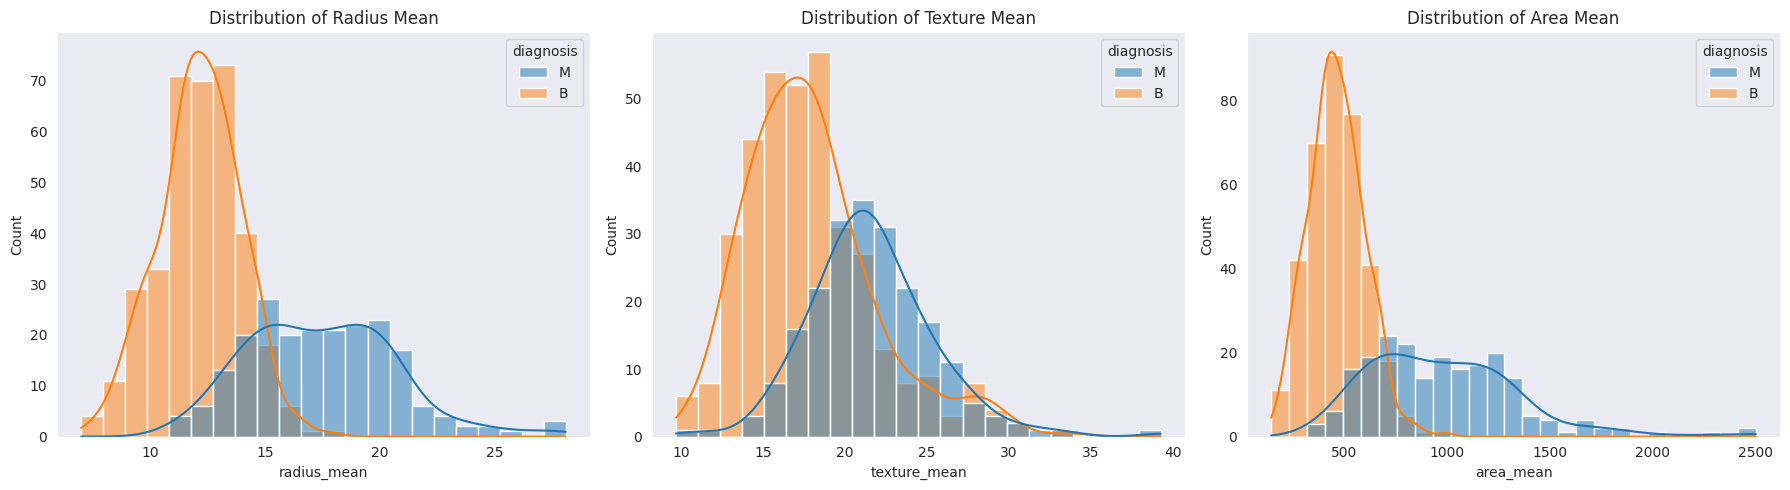

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("dark")

# Plot histograms for a few key geometrical aspects
plt.figure(figsize=(18, 5))

# Radius Mean
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True)
plt.title('Distribution of Radius Mean')

# Texture Mean
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='texture_mean', hue='diagnosis', kde=True)
plt.title('Distribution of Texture Mean')

# Area Mean
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True)
plt.title('Distribution of Area Mean')

plt.tight_layout()
plt.show()




**Radius Mean**: The distribution shows that malignant tumors tend to have a larger mean radius compared to benign tumors. This suggests that the size of the tumor can be a distinguishing feature between benign and malignant tumors.

**Texture Mean**: There's a noticeable difference in the texture mean between benign and malignant tumors, with malignant tumors generally displaying a higher texture mean.

**Area Mean**: Similar to the radius mean, the area mean for malignant tumors is significantly larger than that for benign tumors, reinforcing the idea that larger tumors are more likely to be malignant.

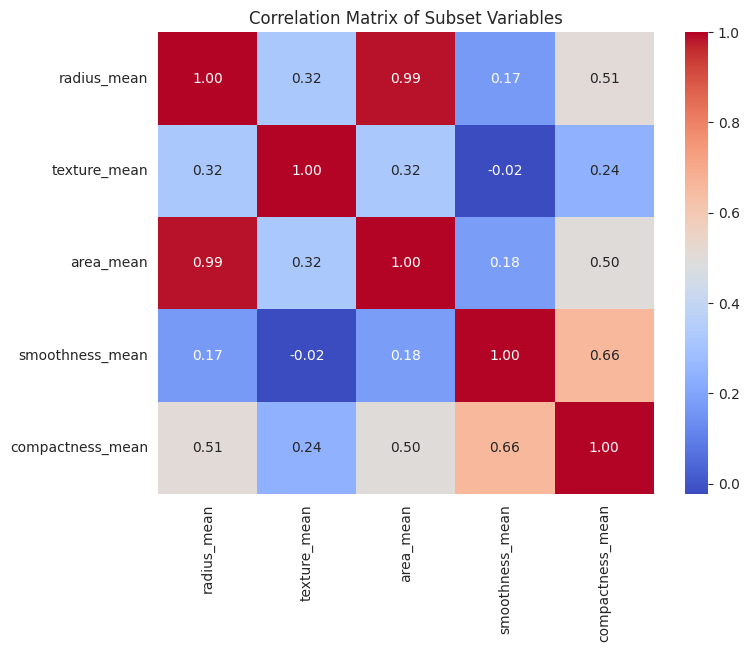

In [5]:
# Correlation analysis for a subset of variables to keep the visualization interpretable
subset_data = df[['diagnosis', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']]
correlation_matrix = subset_data.iloc[:, 1:].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Subset Variables')
plt.show()

There are strong positive correlations between radius_mean, area_mean, and compactness_mean, indicating that as the size of the tumor increases.


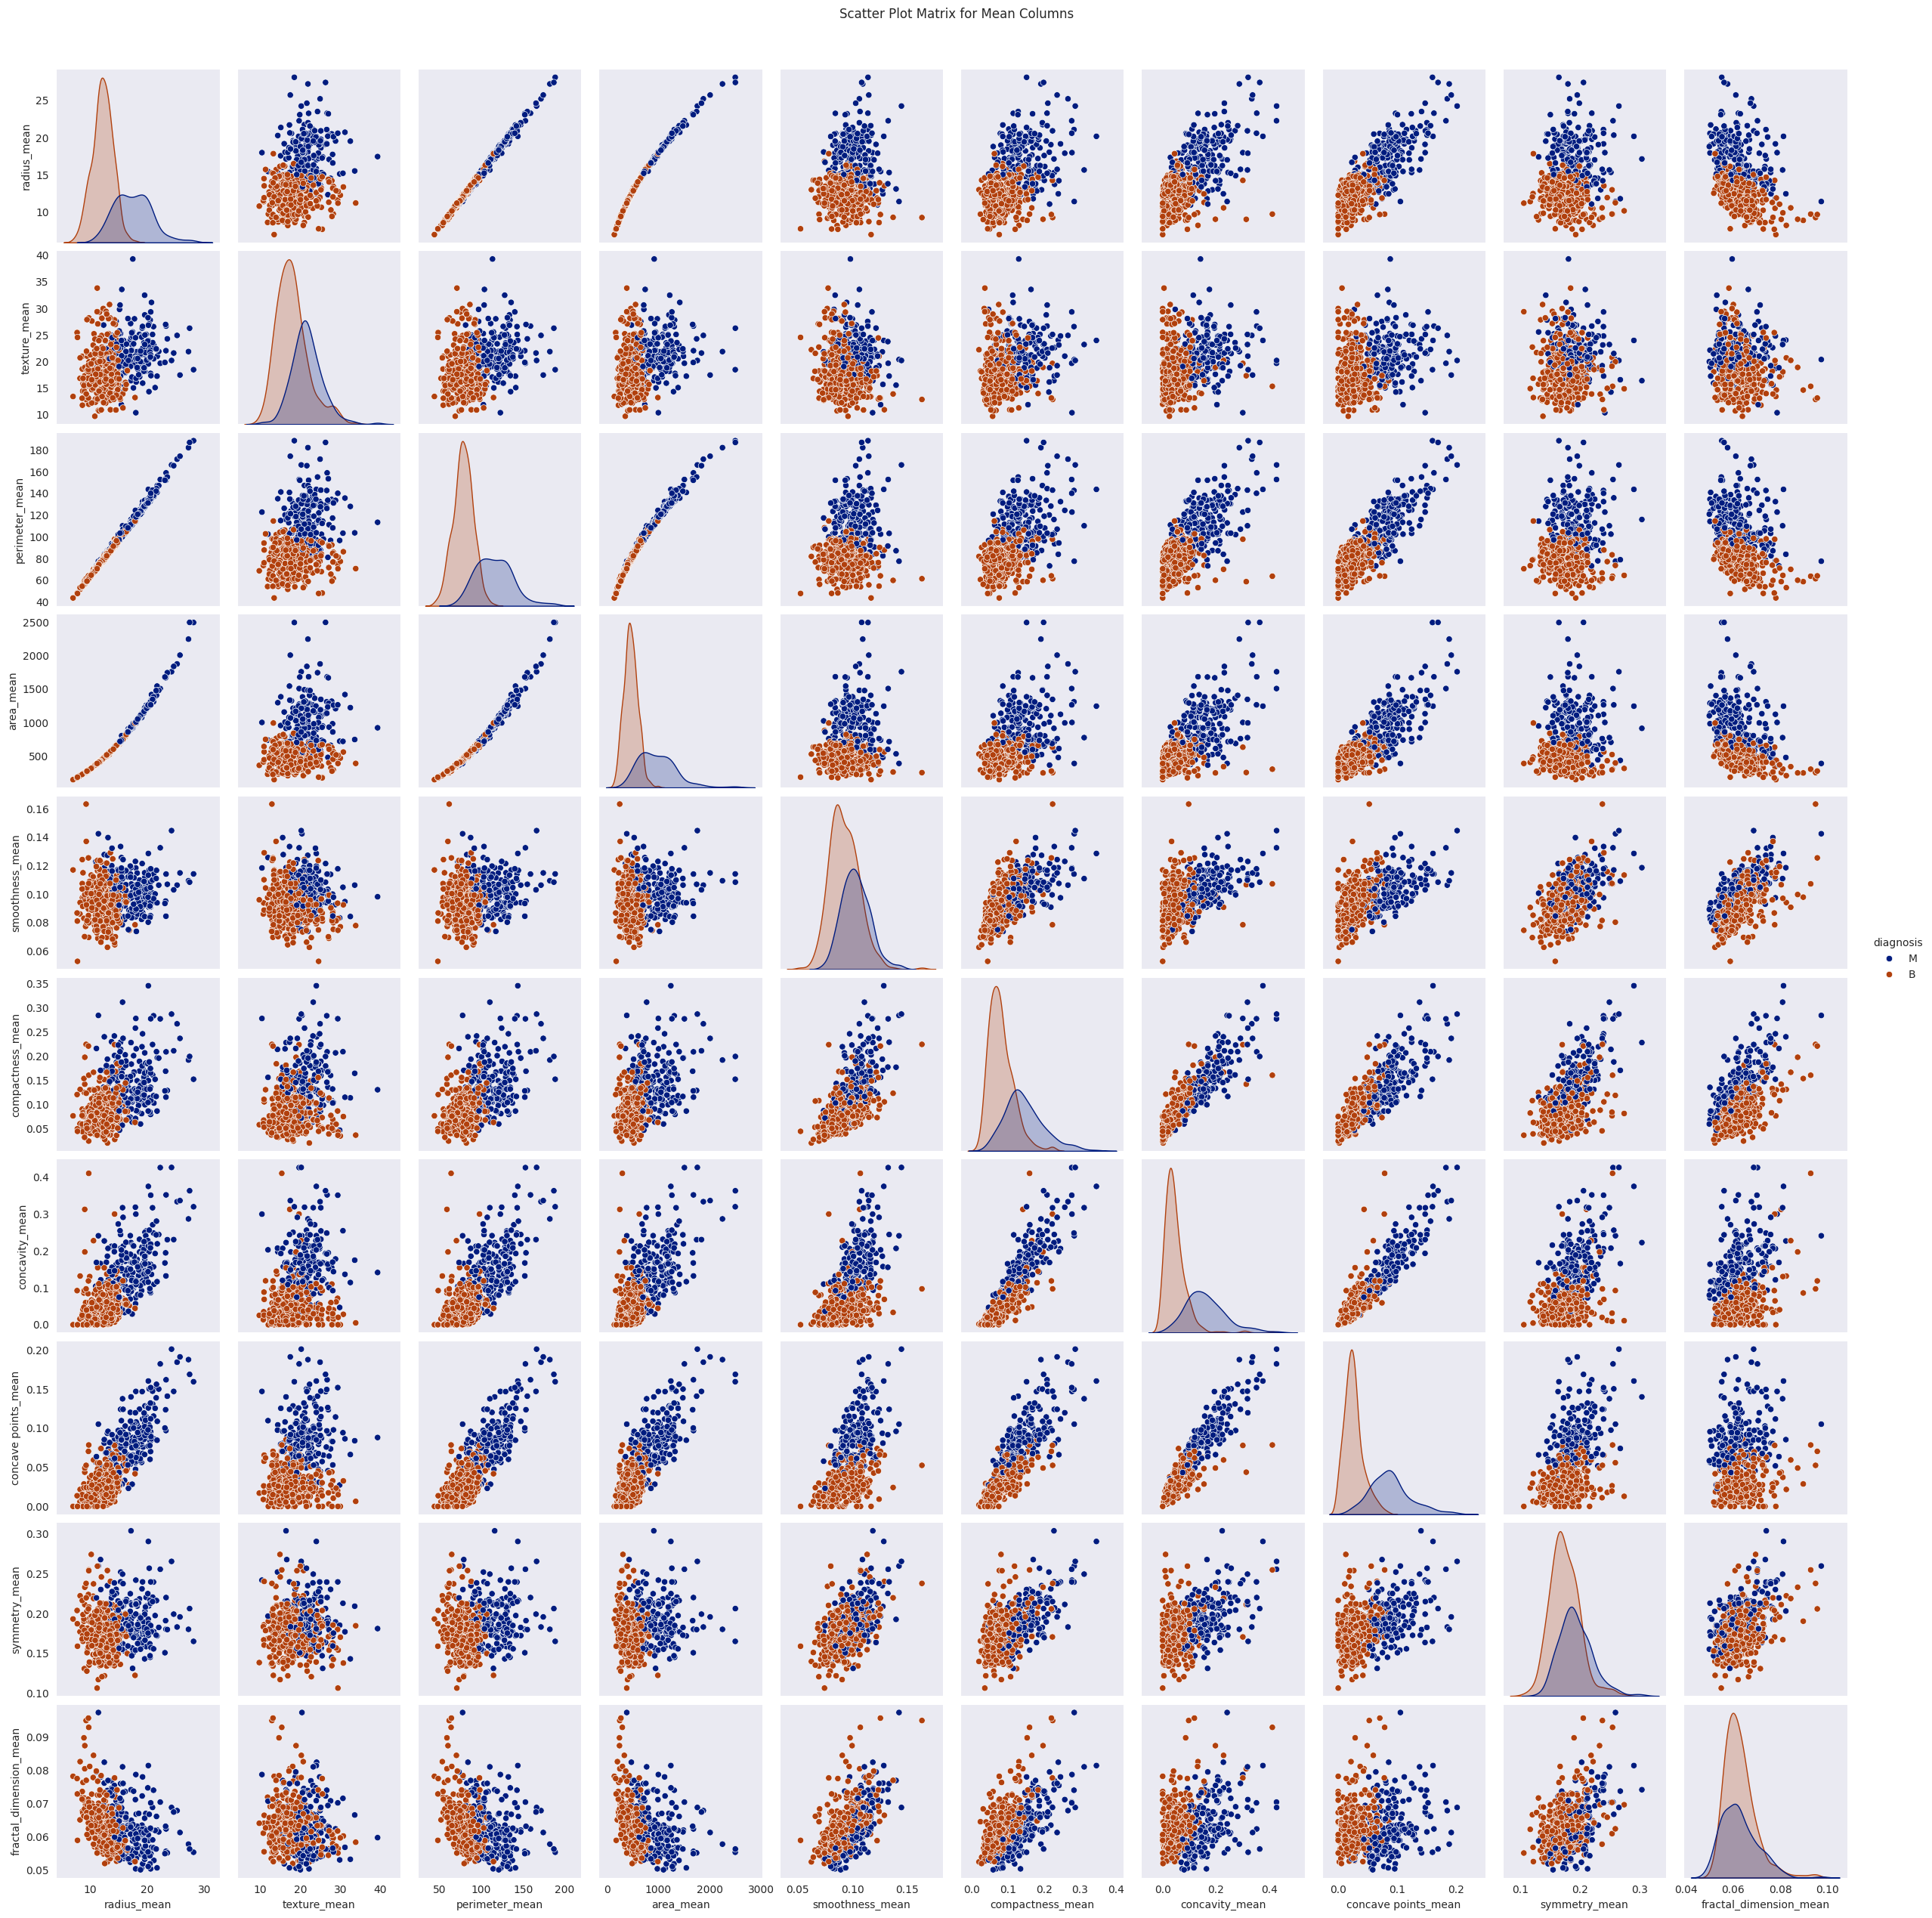

In [6]:
features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
            'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
            'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(df[features], hue='diagnosis', palette='dark')
plt.suptitle('Scatter Plot Matrix for Mean Columns', y=1.02)
plt.show()


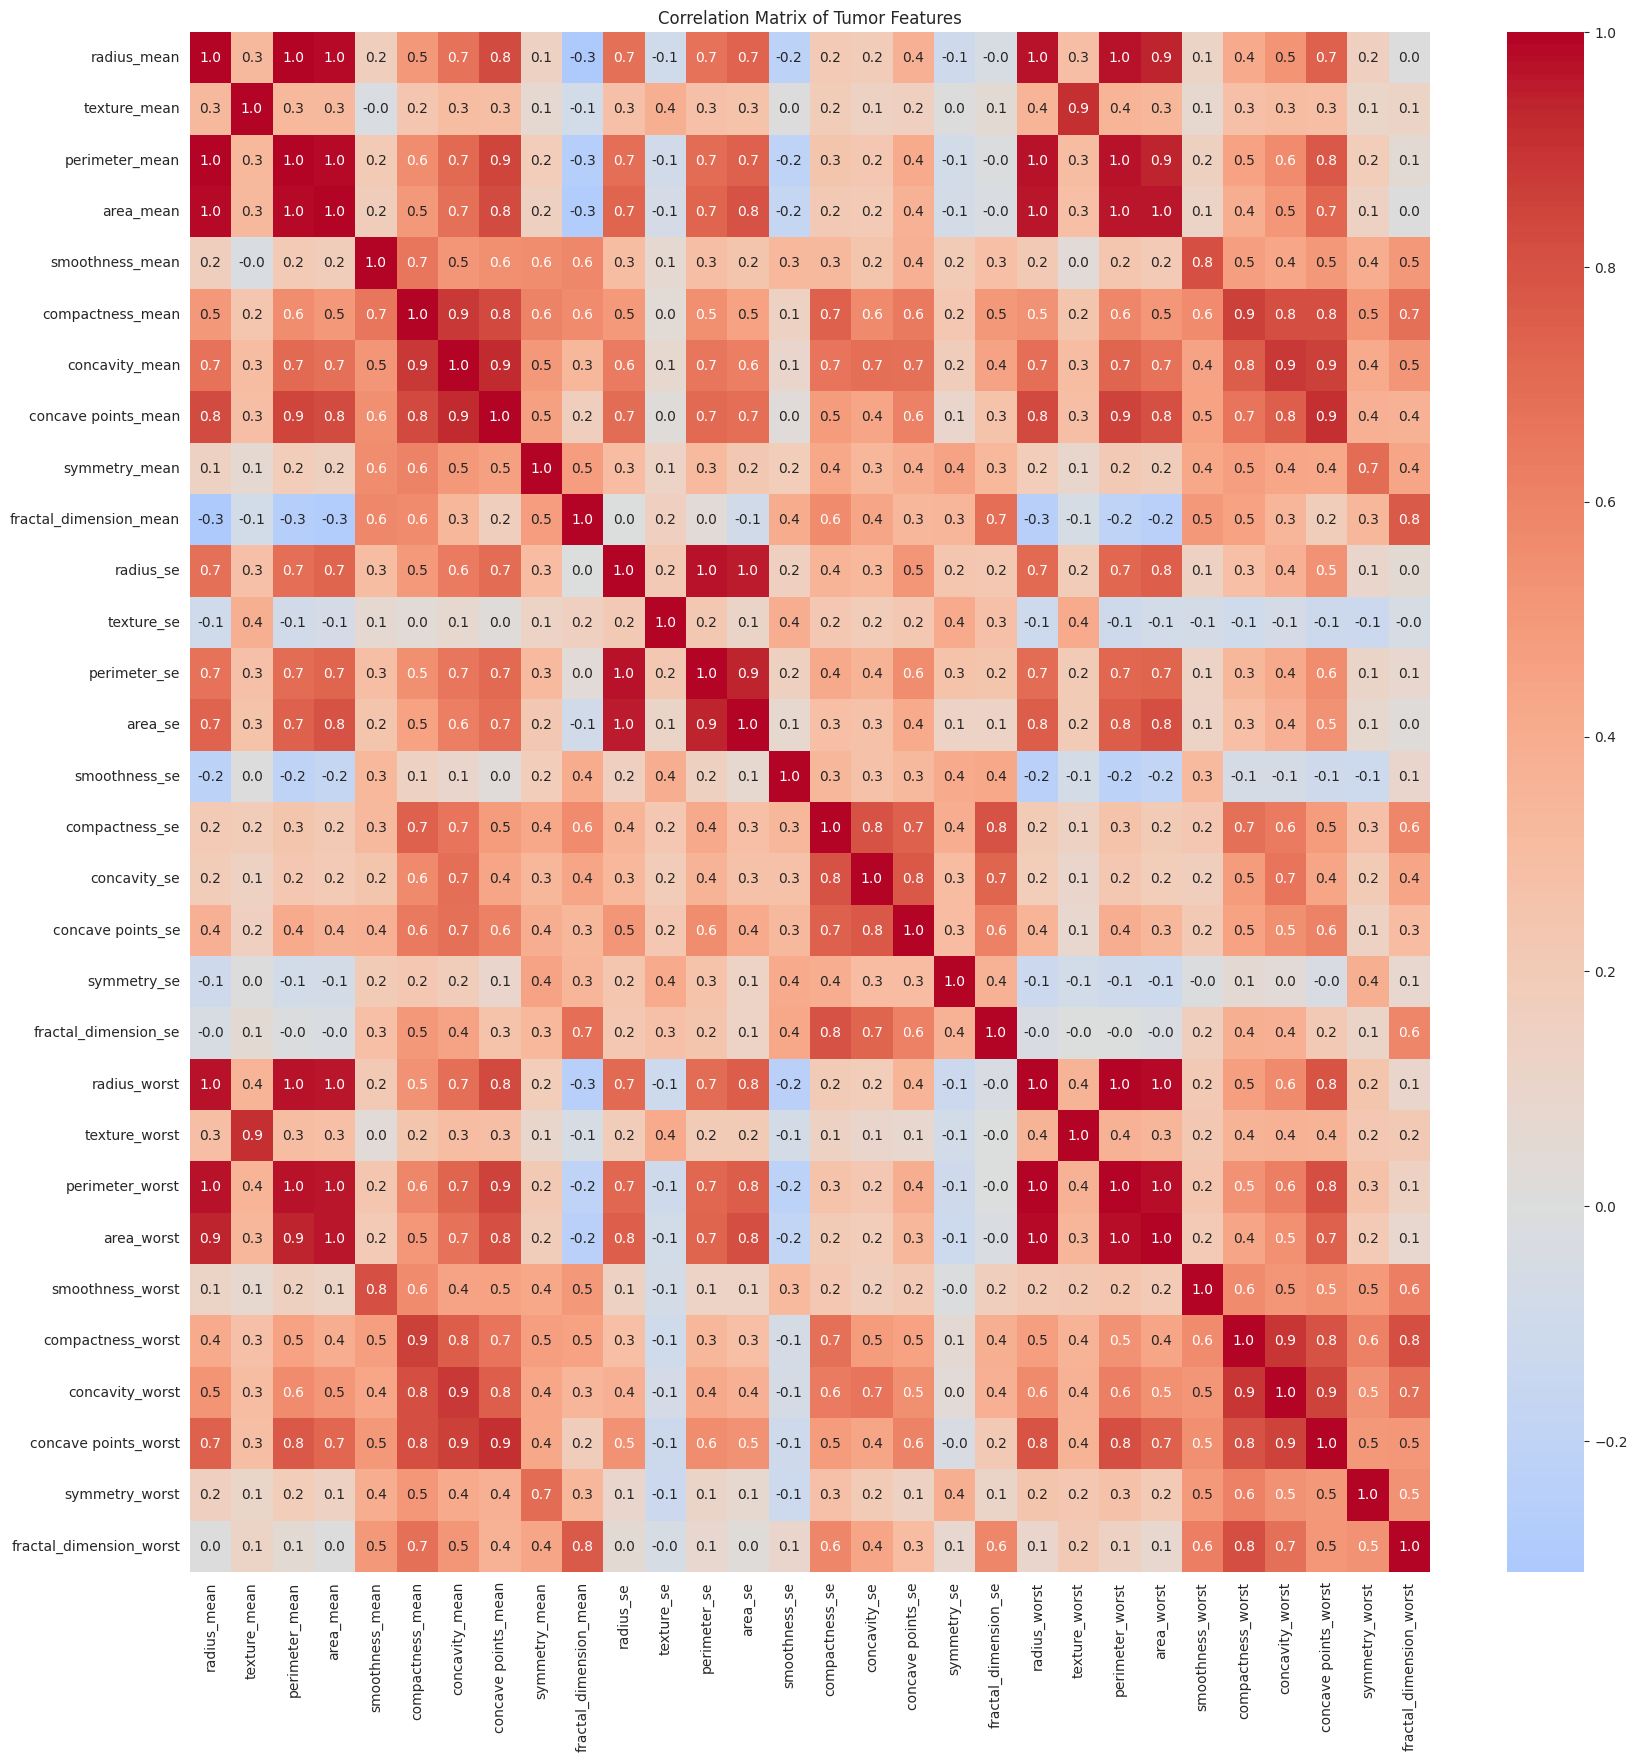

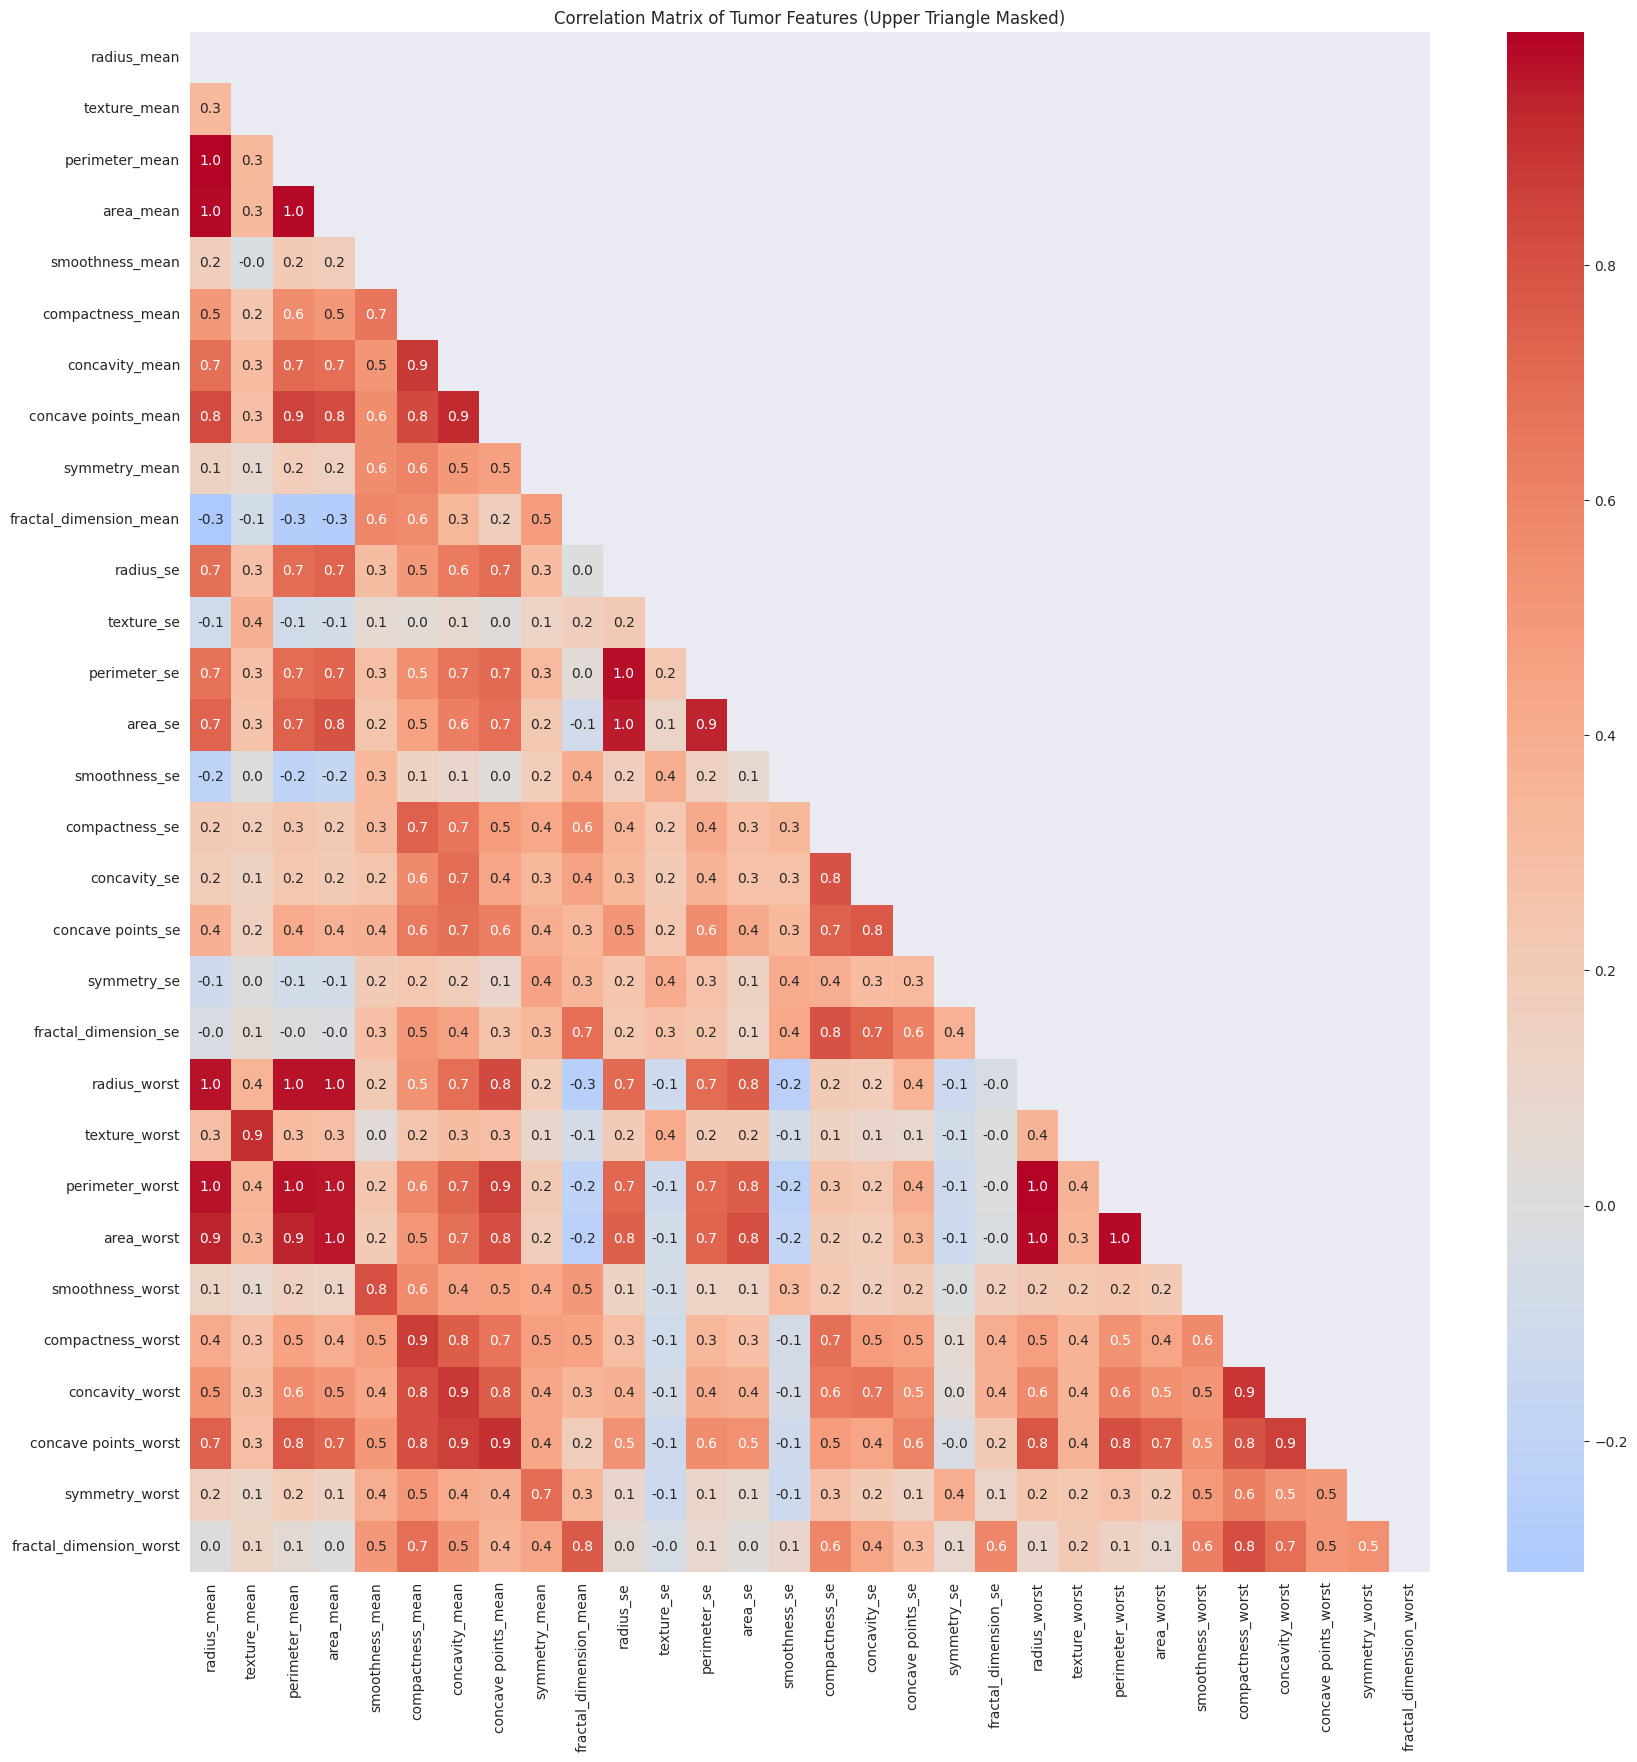

In [7]:
# Calculating the correlation matrix
corr_matrix = df.iloc[:, 2:].corr()  # Exclude 'id' and 'diagnosis' for correlation analysis

# Visualizing the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Tumor Features')
plt.show()

# To focus on highly correlated features, mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Tumor Features (Upper Triangle Masked)')
plt.show()


Examining the correlation matrix, it's evident that significant multicollinearity exists among certain variables. Specifically, the radius_mean column exhibits perfect and nearly perfect correlations (1 and 0.99) with the perimeter_mean and area_mean columns, respectively. This likely stems from the fact that these three metrics fundamentally measure the same attribute: the cell's physical size. Consequently, to streamline our analysis, selecting just one of these size descriptors is prudent.

Additionally, a notable degree of multicollinearity is observed between the "mean" and "worst" measurements. For example, there's a 0.97 correlation between radius_mean and radius_worst. This pattern holds across all ten key attributes, with correlations ranging from 0.7 to 0.97 between the "mean" and "worst" values. Given that "worst" metrics represent extremes of the "mean" measurements, their inclusion offers redundant information. Thus, focusing solely on the "mean" measurements will refine our dataset for further analysis.

Given the redundancy among the three size-related attributes, the choice of which to retain requires consideration. Drawing from basic geometry, where a cell's radius (r) forms the foundation for calculating its perimeter (2πr) and area (πr^2), the radius_mean emerges as the most fundamental measure of cell size. Its direct relation to both perimeter and area validates its selection as the primary size attribute for our analysis.

We will now go head and drop all unnecessary columns.

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


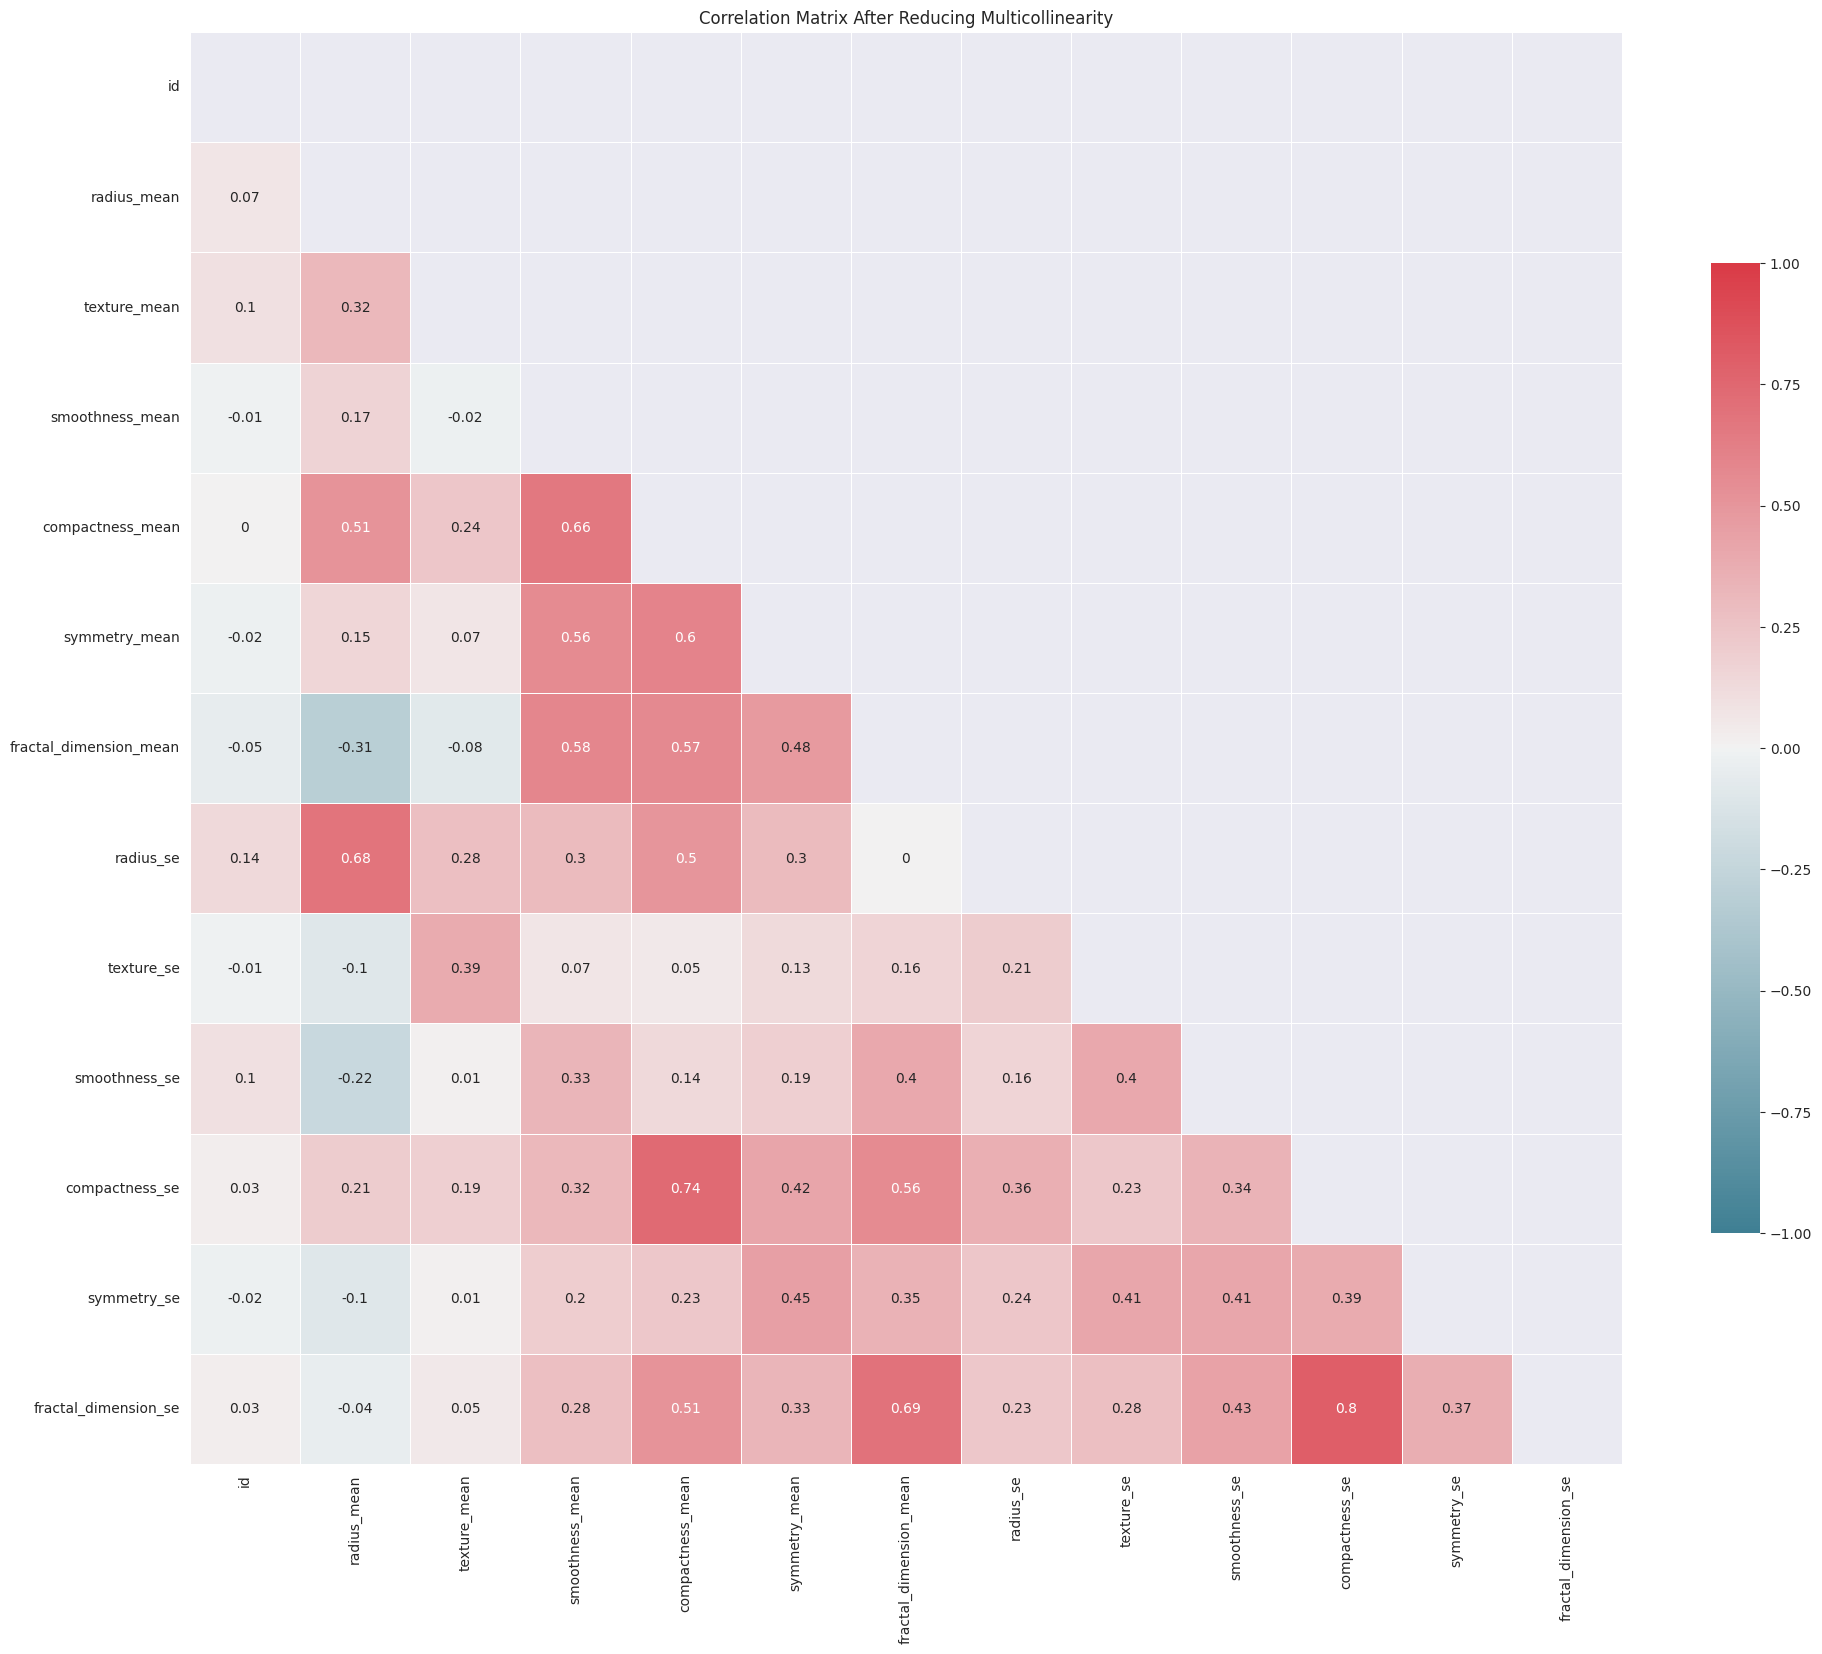

In [8]:

# Drop all "worst" columns
worst_cols = [col for col in df.columns if 'worst' in col]
df = df.drop(worst_cols, axis=1)

# Drop all columns related to the "perimeter" and "area" attributes, focusing on "mean" columns
size_related_cols = ['perimeter_mean', 'perimeter_se', 'area_mean', 'area_se']
df = df.drop(size_related_cols, axis=1)

# Drop all columns related to the "concavity" and "concave points" attributes, again focusing on "mean"
shape_related_cols = ['concavity_mean', 'concavity_se', 'concave points_mean', 'concave points_se']
df = df.drop(shape_related_cols, axis=1)

# Verify remaining columns
print(df.columns)



# Visualize the new correlation matrix for the simplified dataset
corr = df.drop(columns=['diagnosis']).corr().round(2)  # Calculate the correlation matrix and round to 2 decimal places

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plotting the heatmap
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Define the colormap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix After Reducing Multicollinearity')
plt.tight_layout()


In [9]:
print(df.shape)

(569, 14)


In [10]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and fit the TPOT classifier
tpot = TPOTClassifier(verbosity=2, generations=10, population_size=40)
tpot.fit(X_train, y_train)

# Evaluate the TPOT classifier
print(tpot.score(X_test, y_test))


                                                                             
Generation 1 - Current best internal CV score: 0.9271682626538988
                                                                              
Generation 2 - Current best internal CV score: 0.9295759233926129
                                                                              
Generation 3 - Current best internal CV score: 0.9319288645690834
                                                                              
Generation 4 - Current best internal CV score: 0.9412311901504788
                                                                              
Generation 5 - Current best internal CV score: 0.9436388508891929
                                                                              
Generation 6 - Current best internal CV score: 0.9436388508891929
                                                                              
Generation 7 - Current best internal CV score: 0.945

/home/sounak/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/sounak/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [11]:

# Export the best pipeline
tpot.export('best_cancer_pipeline.py')